In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def runBandits(eps_func, k, steps, runs, rewardVar):
    rewards = np.zeros(steps)
    optimalAction = np.zeros(steps)
    
    for iter in range(runs):
        actualValue = np.random.normal(0, 1, k)
        calculatedValue = np.zeros(k)
        actionCount = np.zeros(k)
        
        optimalArm = np.argmax(actualValue)
        for step in range(steps):
            if callable(eps_func):
                epsilon = eps_func(step + 1)
            else: 
                epsilon = eps_func

            if (np.random.rand() < epsilon):
                arm = np.random.randint(0, k)
            else:
                arm = np.argmax(calculatedValue)
            
            reward = np.random.normal(actualValue[arm], np.sqrt(rewardVar))
            rewards[step]+=reward
            
            if arm==optimalArm:
                optimalAction[step] += 1
            actionCount[arm] += 1
            calculatedValue[arm] += (reward - calculatedValue[arm])/actionCount[arm]
            
    rewards /= runs
    optimalAction = (optimalAction/runs)*100
    
    return rewards, optimalAction

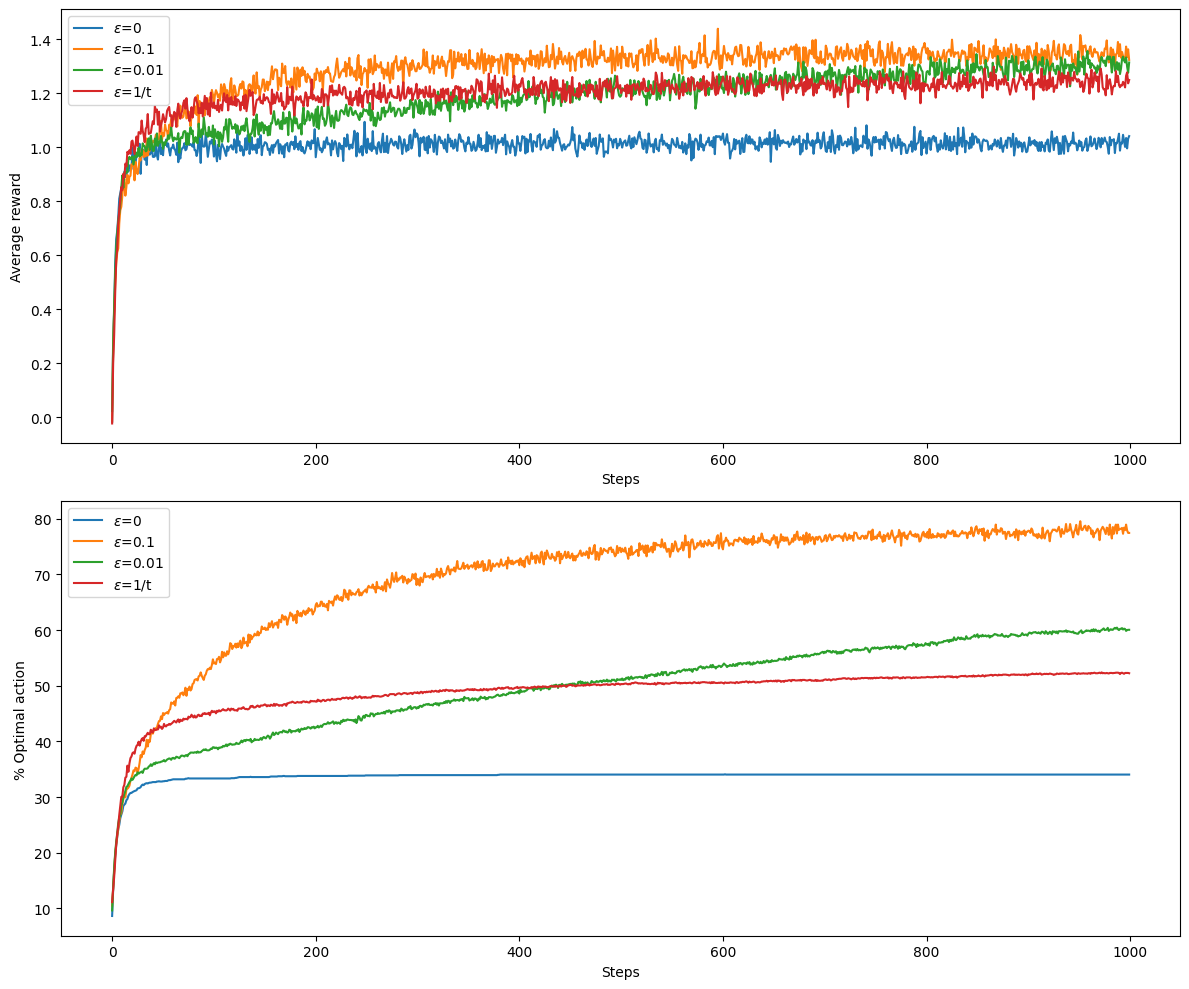

In [8]:
epsilons = [0, 0.1, 0.01]
eps_func = lambda t: 1 / t

rewards = []
optimalAction = []

for eps in epsilons:
    reward, action = runBandits(eps, 10, 1000, 2000, 1)
    rewards.append(reward)
    optimalAction.append(action)

reward, action = runBandits(eps_func, 10, 1000, 2000, 1)
rewards.append(reward)
optimalAction.append(action)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
for i, eps in enumerate(epsilons + ["1/t"]):
    plt.plot(rewards[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal Action Plot
plt.subplot(2, 1, 2)
for i, eps in enumerate(epsilons + ["1/t"]):
    plt.plot(optimalAction[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
def banditsError(eps_func, k, steps, runs, rewardVar):
    absErrors = np.zeros((k, steps))
    
    for iter in range(runs):
        actualValue = np.random.normal(0, 1, k)
        calculatedValue = np.zeros(k)
        actionCount = np.zeros(k)
        
        for step in range(steps):
            if callable(eps_func):
                eps = eps_func(step + 1)
            else: 
                eps = eps_func
                
            if np.random.rand() < eps:
                arm = np.random.randint(0, k)
            else:
                arm = np.argmax(calculatedValue)
            
            reward = np.random.normal(actualValue[arm], np.sqrt(rewardVar))
            
            actionCount[arm] += 1
            calculatedValue[arm] += (reward - calculatedValue[arm])/actionCount[arm]
            
            for i in range(k):
                absErrors[i,step] += abs(actualValue[i] - calculatedValue[i])
    
    absErrors /= runs
    return absErrors

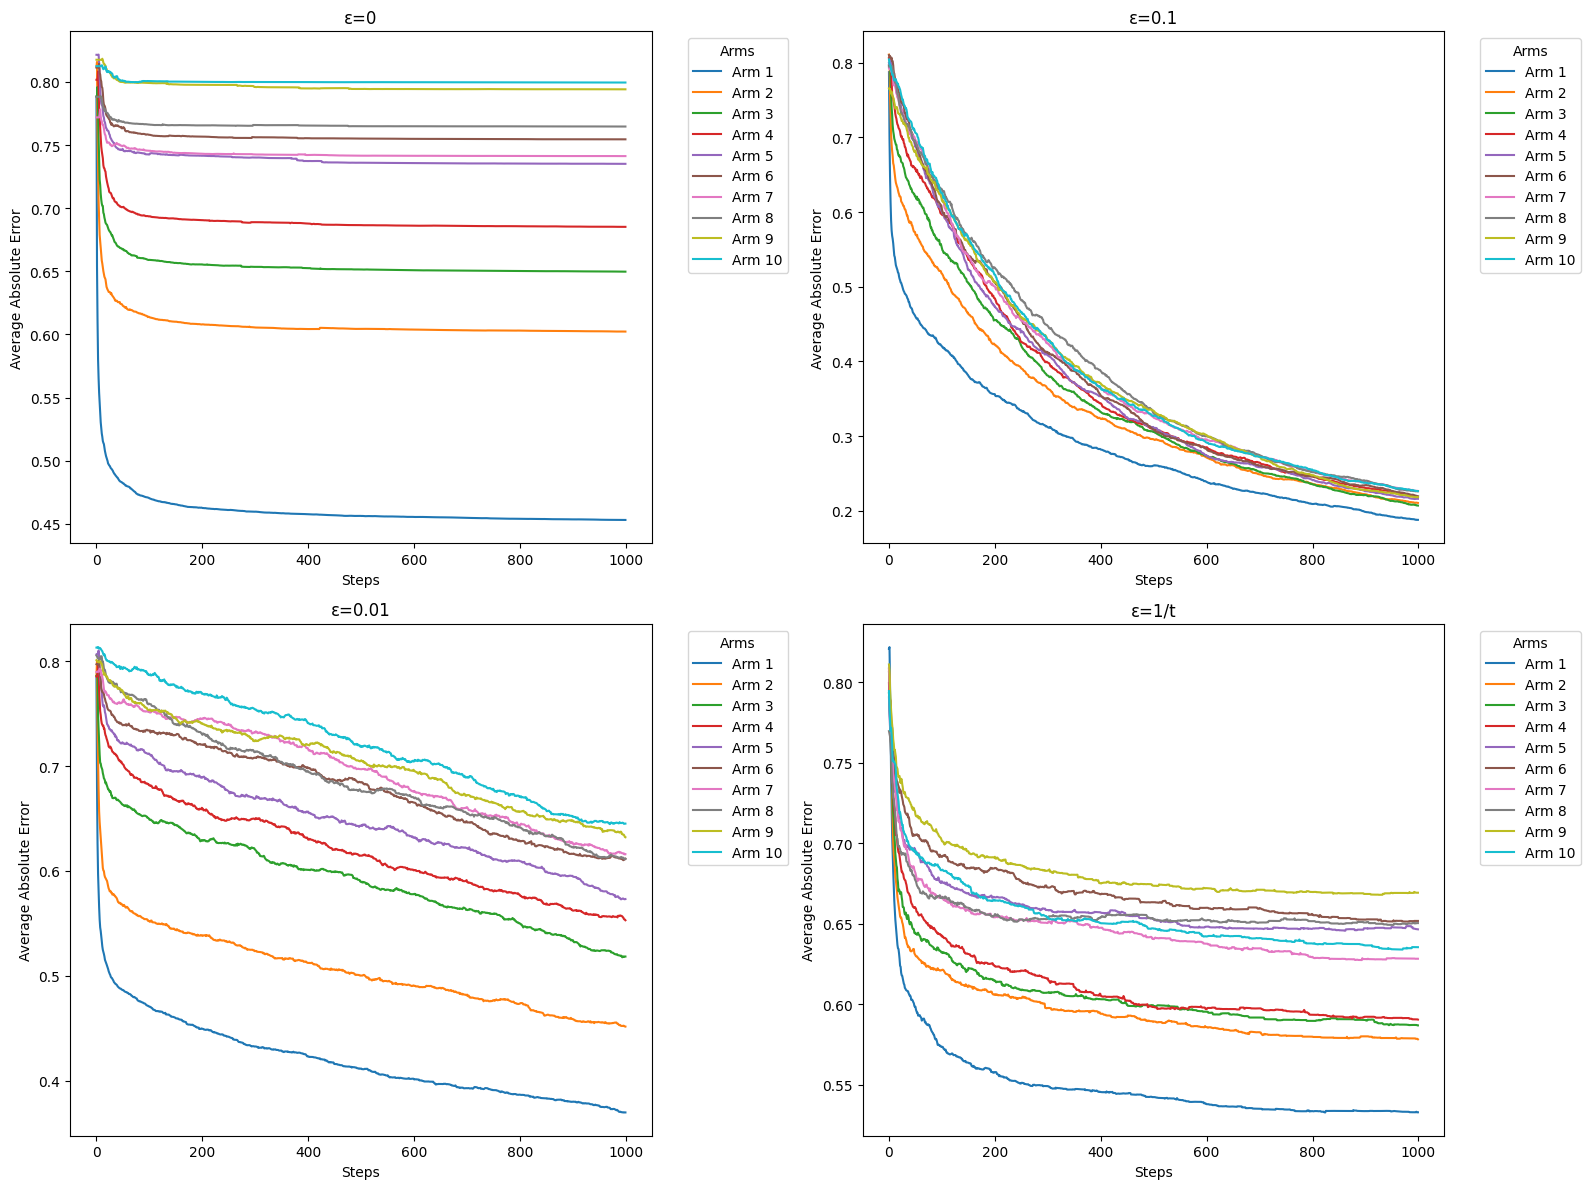

In [10]:
epsilons = [0, 0.1, 0.01]
eps_func = lambda t: 1 / t

results = {}

for eps in epsilons + [eps_func]:
    label = f"ε={eps}" if not callable(eps) else "ε=1/t"
    results[label] = banditsError(eps, 10, 1000, 2000, 1)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (label, abs_errors) in enumerate(results.items()):
    ax = axes[i]
    for arm in range(10):
        ax.plot(abs_errors[arm], label=f"Arm {arm + 1}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Average Absolute Error")
    ax.set_title(f"{label}")
    ax.legend(title="Arms", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

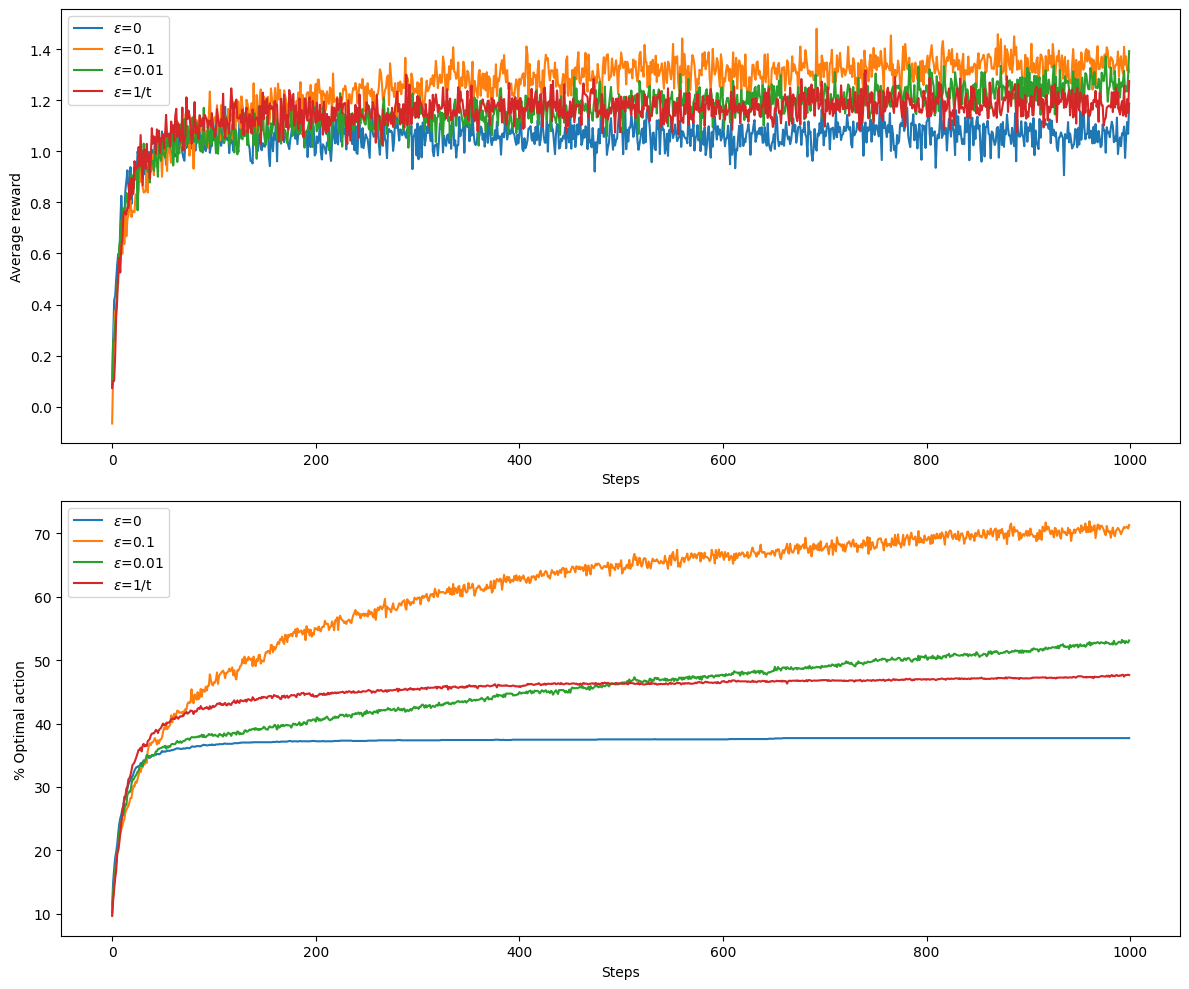

In [11]:
epsilons = [0, 0.1, 0.01]
eps_func = lambda t: 1 / t

rewards = []
optimalAction = []

for eps in epsilons:
    reward, action = runBandits(eps, 10, 1000, 2000, 4)
    rewards.append(reward)
    optimalAction.append(action)

reward, action = runBandits(eps_func, 10, 1000, 2000, 4)
rewards.append(reward)
optimalAction.append(action)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
for i, eps in enumerate(epsilons + ["1/t"]):
    plt.plot(rewards[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

plt.subplot(2, 1, 2)
for i, eps in enumerate(epsilons + ["1/t"]):
    plt.plot(optimalAction[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.tight_layout()
plt.show()

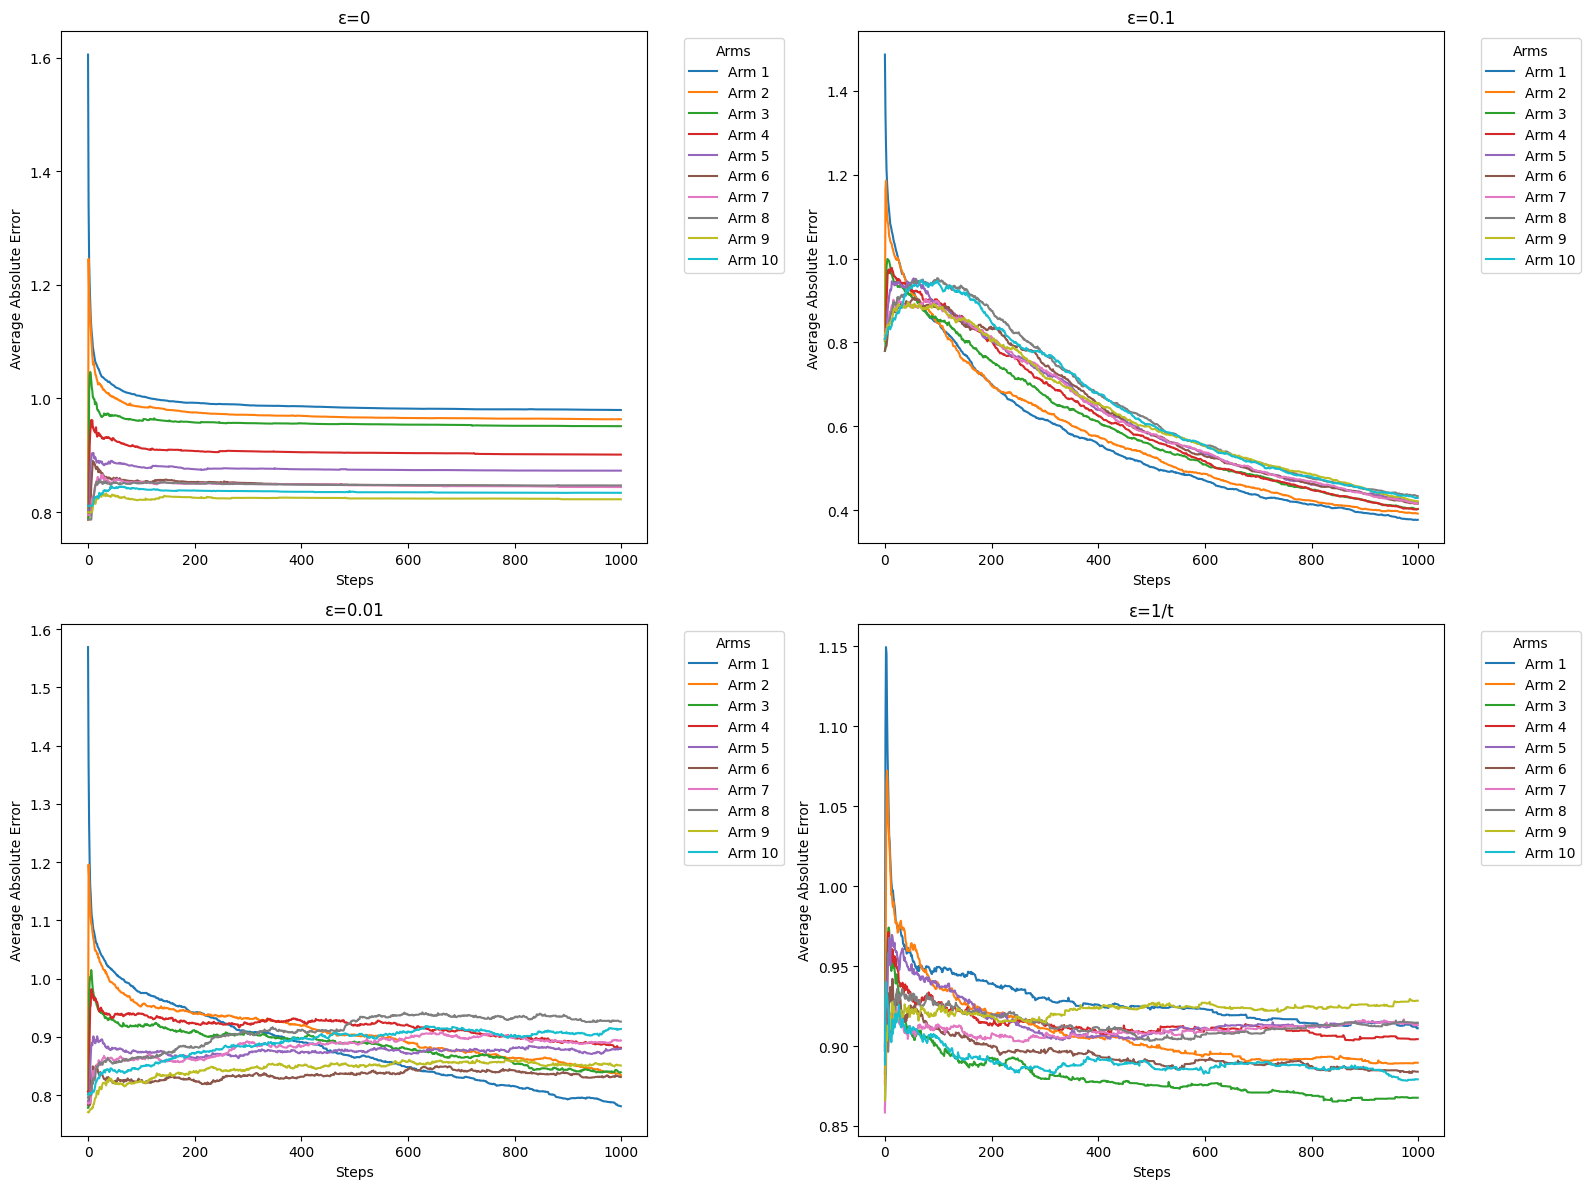

In [12]:
epsilons = [0, 0.1, 0.01]
eps_func = lambda t: 1 / t

results = {}

for eps in epsilons + [eps_func]:
    label = f"ε={eps}" if not callable(eps) else "ε=1/t"
    results[label] = banditsError(eps, 10, 1000, 2000, 4)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (label, abs_errors) in enumerate(results.items()):
    ax = axes[i]
    for arm in range(10):
        ax.plot(abs_errors[arm], label=f"Arm {arm + 1}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Average Absolute Error")
    ax.set_title(f"{label}")
    ax.legend(title="Arms", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

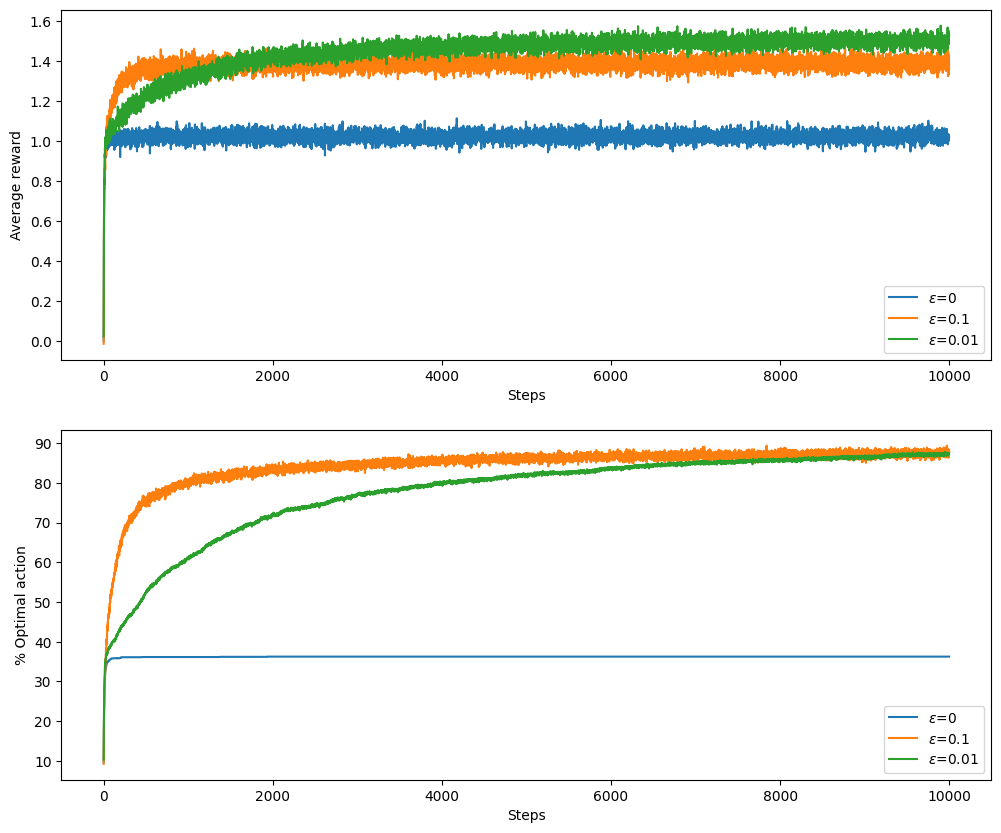

In [13]:
epsilons = [0, 0.1, 0.01]
rewards = []
optimalAction = []

for eps in epsilons:
    reward, action = runBandits(eps, 10, 10000, 2000, 1)
    rewards.append(reward)
    optimalAction.append(action)

plt.figure(figsize=(12, 10))

# Average Reward Plot
plt.subplot(2, 1, 1)
for i, eps in enumerate(epsilons):
    plt.plot(rewards[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

plt.subplot(2, 1, 2)
for i, eps in enumerate(epsilons):
    plt.plot(optimalAction[i], label=f"$\\epsilon$={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

In [14]:
def nonStationaryBandit(epsilon, k, steps, runs, alpha=None, std=0.01):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for run in range(runs):
        phiStar = np.zeros(k)
        calculatedValues = np.zeros(k)
        actionCount = np.zeros(k)

        for step in range(steps):
            phiStar += np.random.normal(0, std, k)

            if np.random.rand() < epsilon:
                action = np.random.randint(0, k)
            else:
                action = np.argmax(calculatedValues)

            reward = np.random.normal(phiStar[action], 1)
            rewards[step] += reward

            actionCount[action] += 1

            if alpha is None:
                calculatedValues[action] += (reward - calculatedValues[action]) / actionCount[action]
            else:
                calculatedValues[action] += alpha * (reward - calculatedValues[action])

            if action == np.argmax(phiStar):
                optimal_action_counts[step] += 1

    rewards /= runs
    optimal_action_counts = (optimal_action_counts / runs) * 100

    return rewards, optimal_action_counts

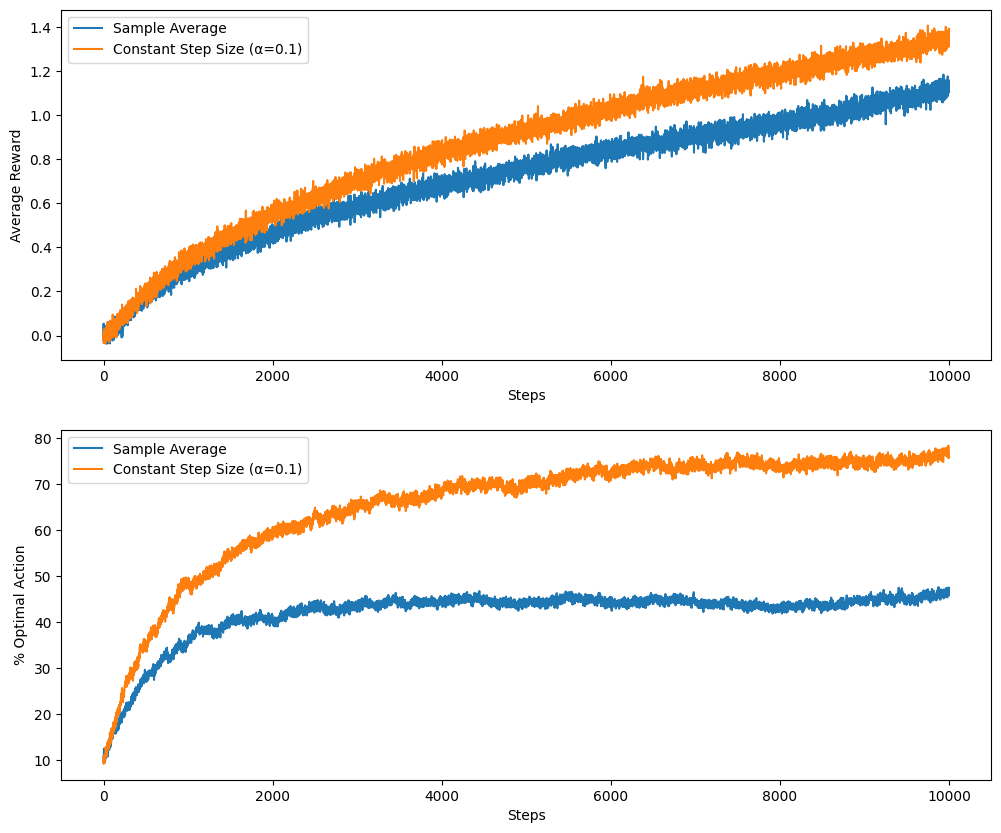

In [15]:
rewardSample, optimalSample = nonStationaryBandit(0.1, 10, 10000, 2000)
rewardsConstant, optimalConstant = nonStationaryBandit(0.1, 10, 10000, 2000, alpha=0.1)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(rewardSample, label='Sample Average')
plt.plot(rewardsConstant, label='Constant Step Size (α=0.1)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(optimalSample, label='Sample Average')
plt.plot(optimalConstant, label='Constant Step Size (α=0.1)')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.legend()

plt.show()

In [16]:
def confidenceBandits(k, steps, runs, confidence):
    rewards = np.zeros(steps)
    
    for iter in range(runs):
        actualValue = np.random.normal(0, 1, k)
        calculatedValue = np.zeros(k)
        actionCount = np.zeros(k)
        
        for step in range(steps):
            if steps < k:
                arm = step
            else: 
                arm = np.argmax(calculatedValue + confidence * np.sqrt(np.log(step+1)/(actionCount + 1e-5)))
            
            reward = np.random.normal(actualValue[arm], 1)
            rewards[step]+=reward
            
            actionCount[arm] += 1
            calculatedValue[arm] += (reward - calculatedValue[arm])/actionCount[arm]
    rewards /= runs
    
    return rewards

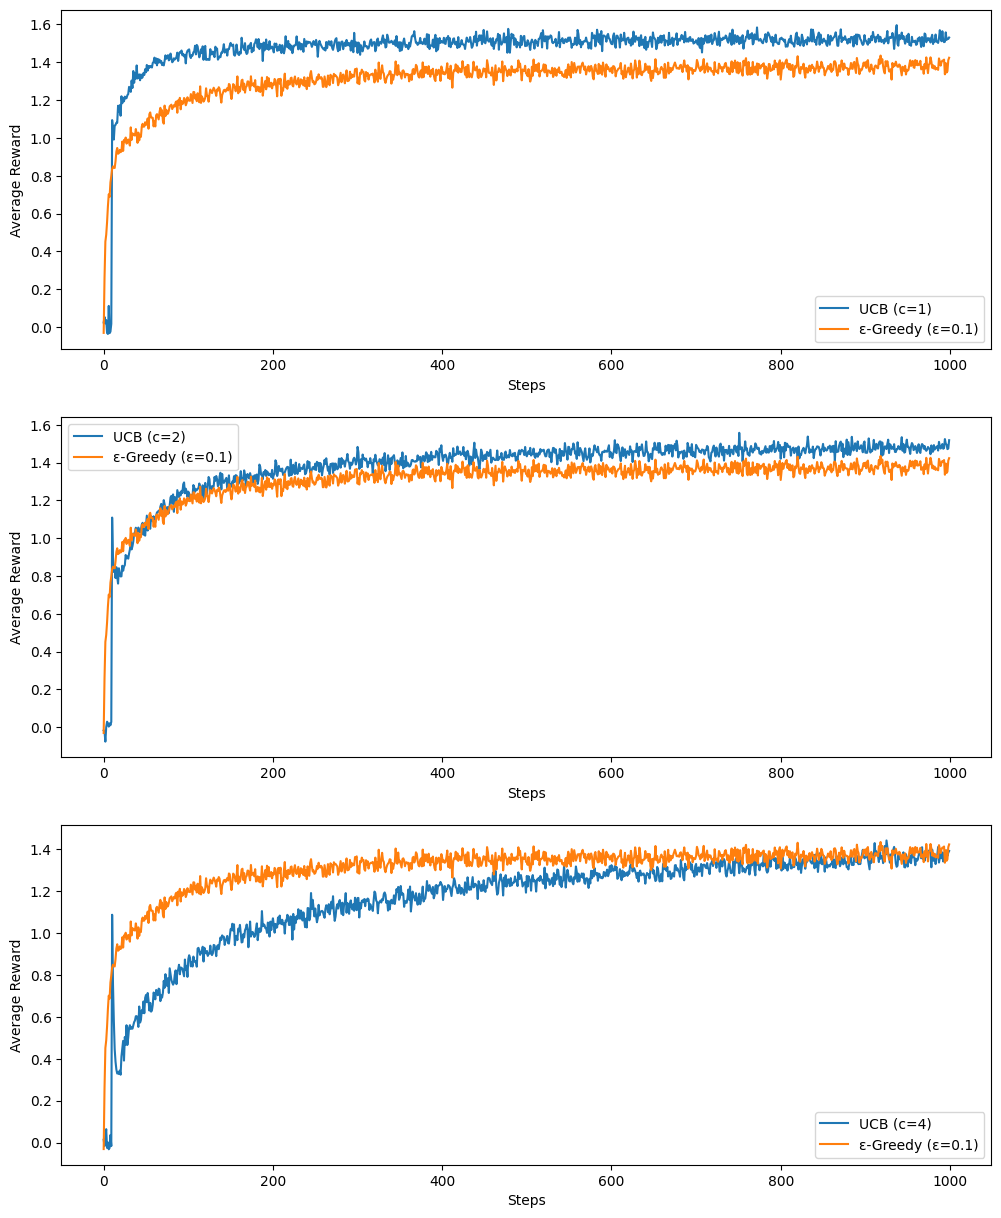

In [17]:
rewardUCB4 = confidenceBandits(10, 1000, 2000, 4)
rewardUCB2 = confidenceBandits(10, 1000, 2000, 2)
rewardUCB1 = confidenceBandits(10, 1000, 2000, 1)
rewardGreedy, action = runBandits(0.1, 10, 1000, 2000, 1)

plt.figure(figsize=(12, 15))

plt.subplot(3, 1, 1)
plt.plot(rewardUCB1, label='UCB (c=1)')
plt.plot(rewardGreedy, label='ε-Greedy (ε=0.1)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(rewardUCB2, label='UCB (c=2)')
plt.plot(rewardGreedy, label='ε-Greedy (ε=0.1)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(rewardUCB4, label='UCB (c=4)')
plt.plot(rewardGreedy, label='ε-Greedy (ε=0.1)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.show()

In [18]:
def gradientBandit(k, steps, runs, alpha, base):
    optimalCount = np.zeros(steps)

    for run in range(runs):
        phiStar = np.random.normal(4, 1, k)
        optimalAction = np.argmax(phiStar)

        H = np.zeros(k)
        if base:
            R_mean = 0
        else:
            R_mean = None

        for step in range(steps):
            pi = np.exp(H) / np.sum(np.exp(H))
            action = np.random.choice(np.arange(k), p=pi)
            reward = np.random.normal(phiStar[action], 1)

            if base:
                R_mean += (reward - R_mean) / (step + 1)

            baseline = R_mean if base else 0
            H[action] += alpha * (reward - baseline) * (1 - pi[action])
            for a in range(k):
                if a != action:
                    H[a] -= alpha * (reward - baseline) * pi[a]

            if action == optimalAction:
                optimalCount[step] += 1

    return optimalCount / runs * 100

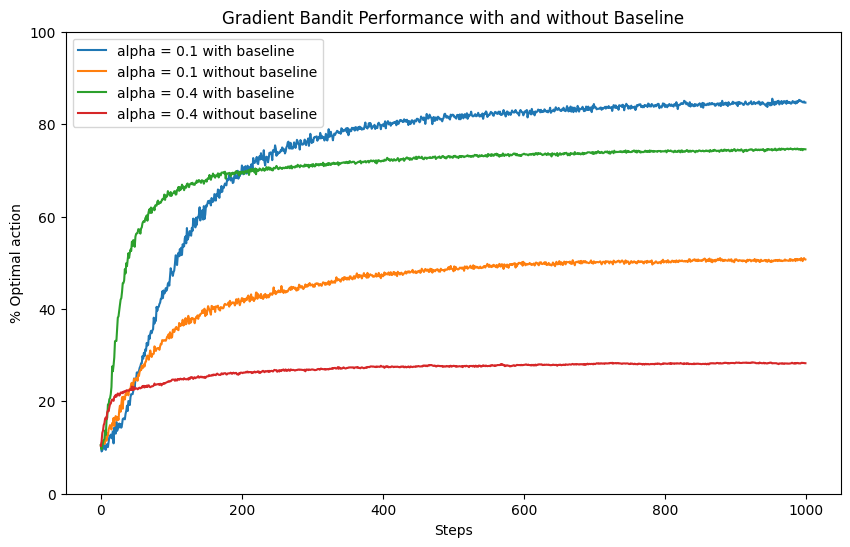

In [19]:
optimalOne = gradientBandit(10, 1000, 2000, 0.1, True)
optimalOne_ = gradientBandit(10, 1000, 2000, 0.1, False)

optimalFour = gradientBandit(10, 1000, 2000, 0.4, True)
optimalFour_ = gradientBandit(10, 1000, 2000, 0.4, False)

plt.figure(figsize=(10, 6))
plt.plot(optimalOne, label='alpha = 0.1 with baseline')
plt.plot(optimalOne_, label='alpha = 0.1 without baseline')
plt.plot(optimalFour, label='alpha = 0.4 with baseline')
plt.plot(optimalFour_, label='alpha = 0.4 without baseline')

plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.ylim(0, 100)
plt.legend()
plt.title('Gradient Bandit Performance with and without Baseline')
plt.show()